### Robot Learning

### Assignment 2

Solutions are due on 29.04.2025 before the lecture.

### Introduction

Consider the following $9 \times 9$ grid world:

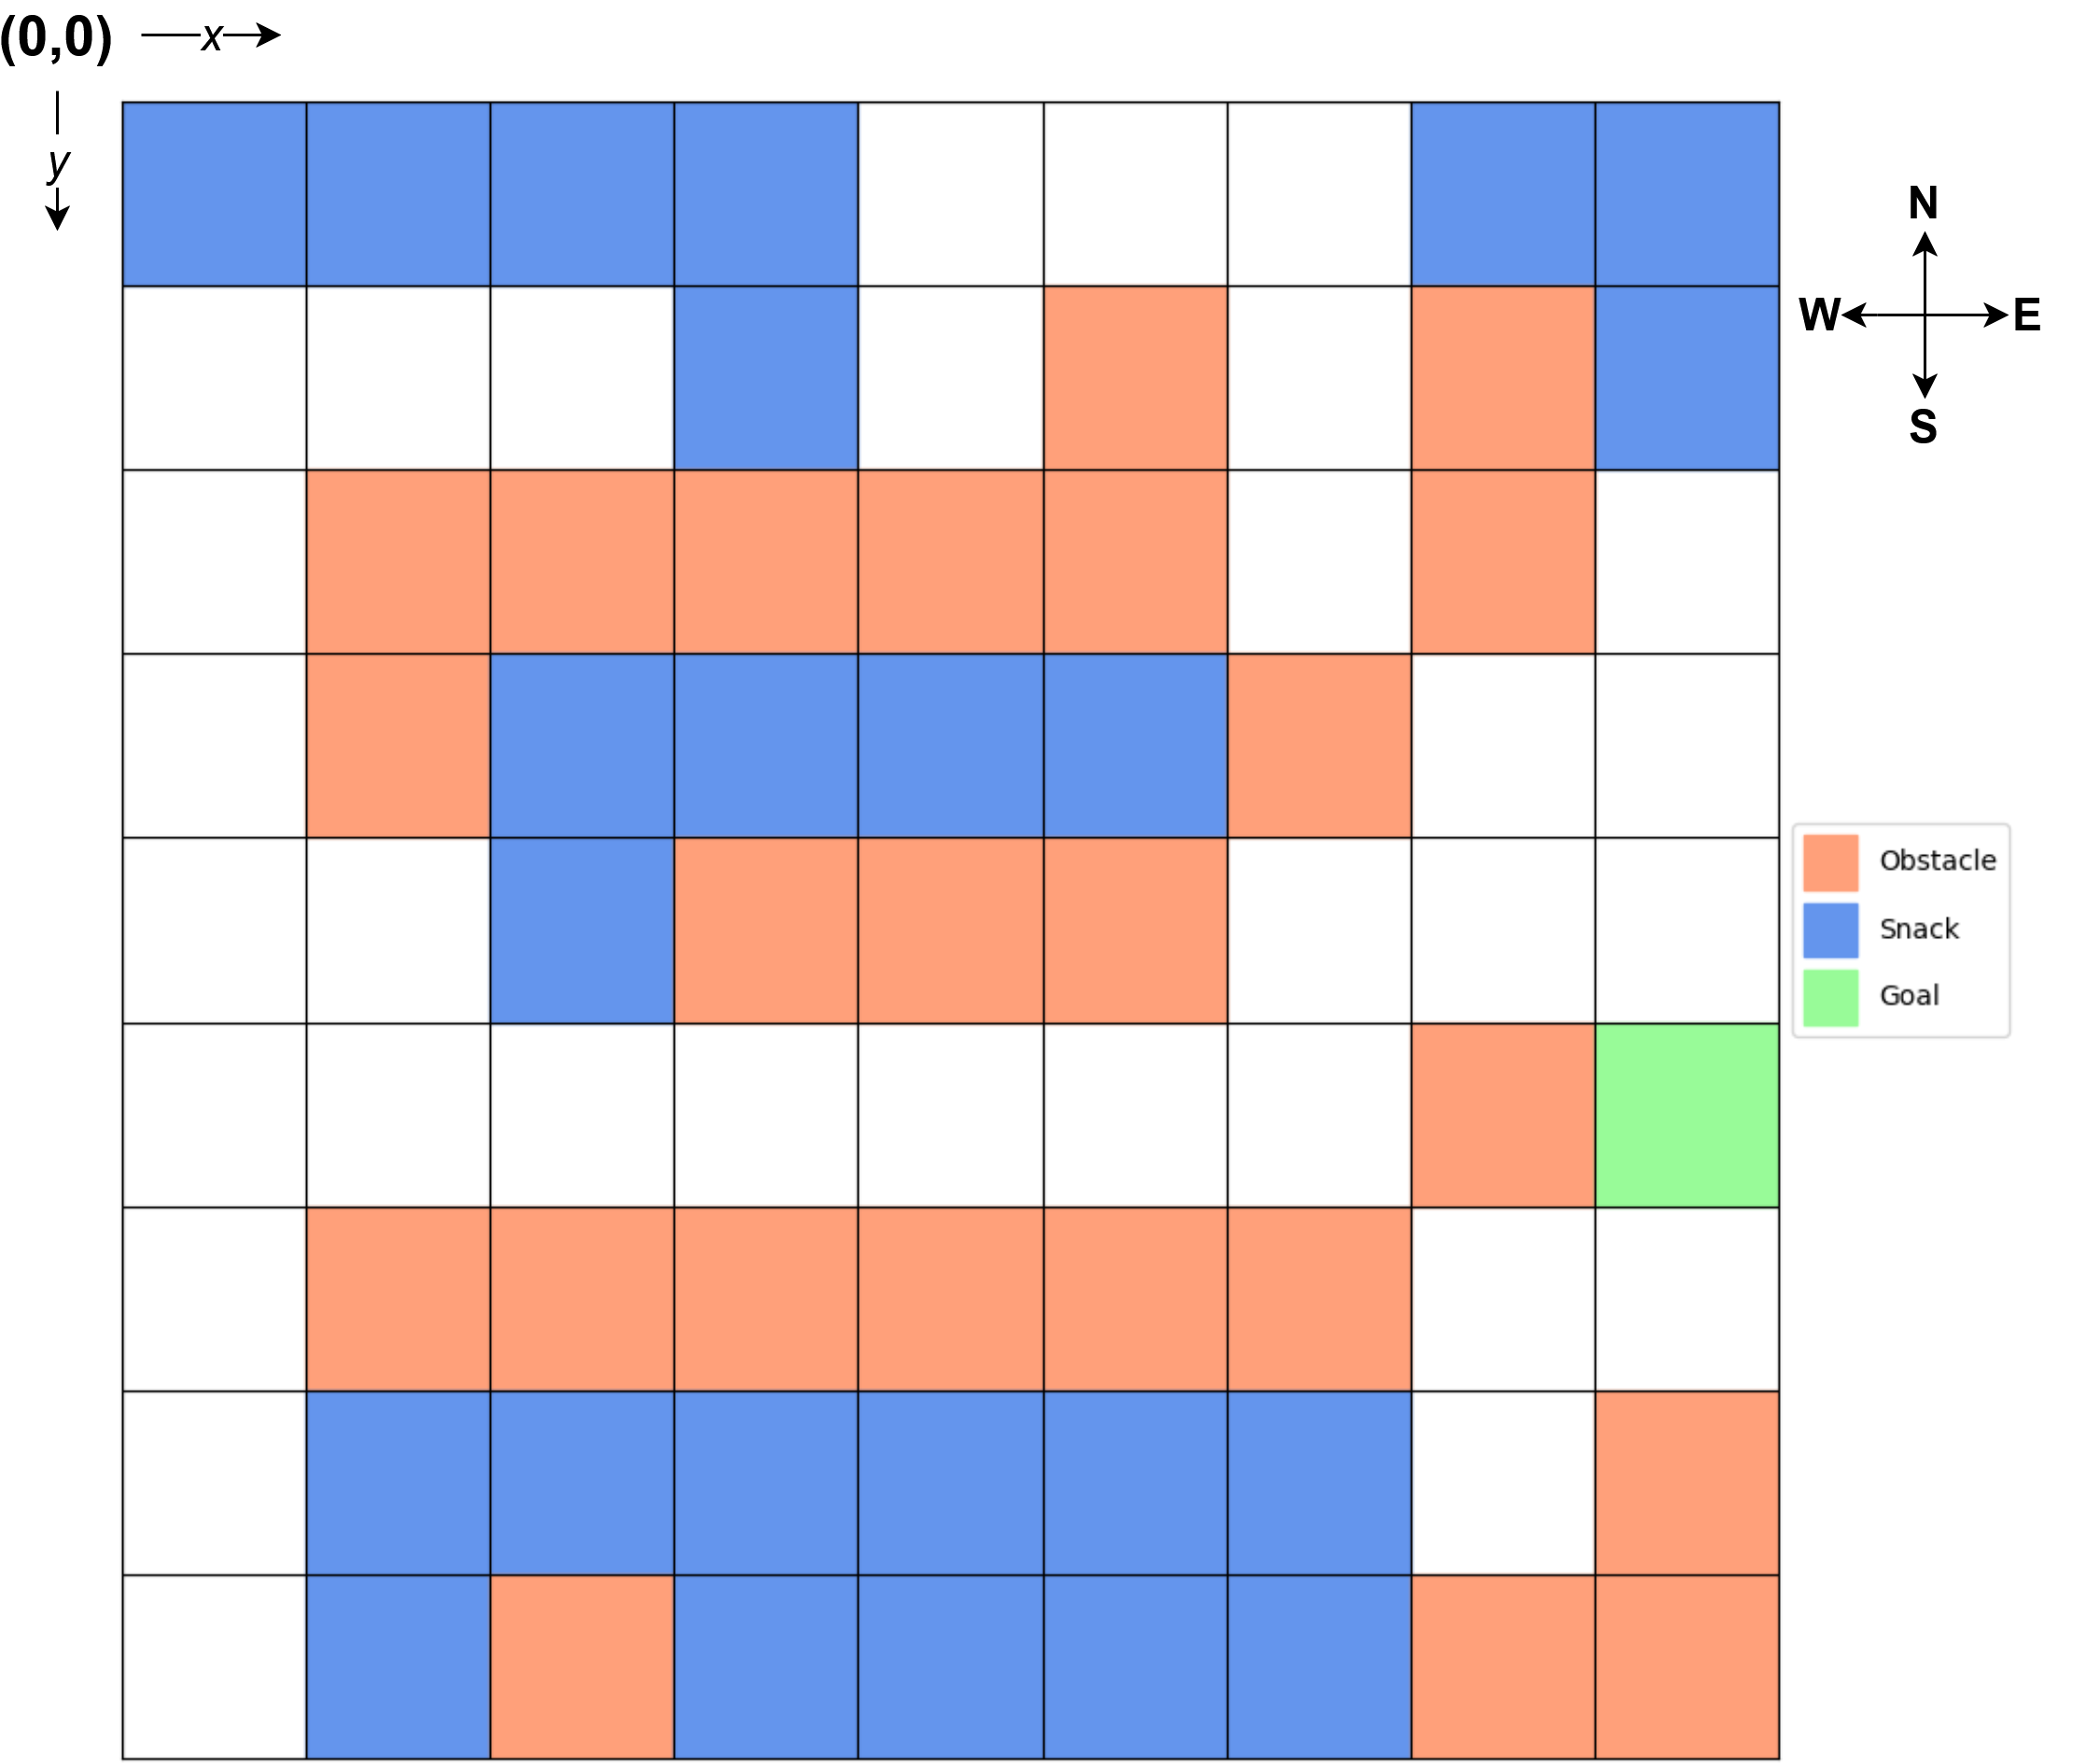

In [ ]:
from IPython.display import Image, display
display(Image(filename='helpers/rl_grid_sketch_25.png', width=650))

The agent may start in any cell that is not an obstacle nor the goal.

It can choose between eight actions, which correspond to moving to the directions

$$a_i \in \{NW,      N,      NE,     E,     SE,    S,     SW,     W\}$$

These are indexed according to the order above, i.e. $a_0 = NW$ and $a_6 = SW$.

The agent must be careful, for the actions are non-deterministic! The agent moves with probability $0.8$ into the desired
direction, but with probability $0.15$ deviates $45^{\circ}$ to the left and with probability $0.05$ deviates $45^{\circ}$
to the right of the desired direction due to treacherous gusts unexpectedly sweeping the grid.

The rewards are structured as follows:

* When it reaches a blue cell, it receives a little snack of 16 points.

* When it attempts to enter a red obstacle cell, it receives -32 points and stays in the cell it came from.

* When it attempts to leave the grid, it receives -32 points and stays in the cell it came from.

* When the agent reaches the green goal cell, it receives 180 points and the episode ends.

* All other actions entering a white cell receive -1 point.

## Task 2.1

To familiarize yourself with the environment above, answer the following questions:

* The agent is at $s = (y_s, x_s) = (3, 5)$ and wants to execute $a_5$. What is the probability $P^a_{s,s'}$ for $s' =(4,6)$?


* The agent is at $s = (4, 7)$ and wants to execute $a_3$. What is the expected value of the reward?

<div style="text-align: right; font-weight:bold"> 1 + 2 = 3 Points </div>

Please answer in this text cell.

1. When execute $a_5$, the moving direction is $S$. \
If we want to go to (4, 6) from (3, 5), the moving direction should be $SE$, which is $45°$ to the left of the desired direction.\
Thus, the probability $P_{ss'}^a = 0.15$
2. $a_3=E$\
The probability of results:
\
\begin{aligned}
P_{ss'}^a =
\begin{cases}
0.8 & \text{if } s' = (4,8) \\
0.15 & \text{if } s' = (3,8) \\
0.05 & \text{if } s' = (5,8)
\end{cases}
\end{aligned}
Thus, the expected value of the reward
$R_{ss'}^a=E\{r_{t+1}|s_t=s,a_t=a,s_{t+1}=s\}=0.8\times(-1)+0.15\times(-1)+0.05\times180=8.05$



## Task 2.2)

Using the *Iterative Policy Evaluation* Algorithm, compute the value $V^{\pi}(s)$ of all accessible cells $s$ for a policy $\pi(s,a)$ that chooses with probability $0.5$ a random action and otherwise attempts to move to the right.

Intialize $V(s)$ with zero, use a discount parameter of $\gamma=0.9$ and show your results by printing your state values $V^{\pi}(s)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

#### Note

For your convenience, you are provided the helper function *getNextStatesRewardsAndProbabilities(state, action)* which returns for a given state $s$ and an action $a$ a list of 3 -tuples of the form

$$[(s_0', R^a_{s,s_0'}, P^a_{s,s_0'}), (s_1', R^a_{s,s_1'}, P^a_{s,s_1'}), \dots]$$

where $s_i'$ are all future states with $P^a_{s,s_i'} \neq 0$. Here $s = (y, x)$ and $s_i' = (y_i', x_i')$ are both tuples of integers, $a \in {0, \dots, 7}$ is an integer, and $R^a_{s,s_i'}$, $P^a_{s,s_i'}$ are both floats.

Also, please find below some data structures which you might find helpful. Create code and text cells as necessary to present your solution!

In your implementation, $V(s)$ should be a $9 \times 9$ numpy array and $\pi(s,a)$ should be a $9 \times 9 \times 8$ numpy array, where $\sum_a \pi(s,a) = 1$ for all s!

In [ ]:
import numpy as np
from helpers.utils import getNextStatesRewardsAndProbabilities
%matplotlib inline

#this is a list of all states
states = [(y,x) for y in range(9) for x in range(9)]
#this is a list of all states containing obstacles
obstacles = [(1,5), (1,7), \
             (2,1), (2,2), (2,3), (2,4), (2,5), (2,7),\
             (3,1), (3,6), \
             (4,3), (4,4), (4,5), \
             (5,7), \
             (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), \
             (7,8), \
             (8,2), (8,7), (8,8)]
#this is a list containing all blue cells
snacks = [(0,0), (0,1), (0,2), (0,3), (0,7), (0,8), \
          (1,3), (1,8), \
          (3,2), (3,3), (3,4), (3,5), \
          (4,2), \
          (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), \
          (8,1), (8,3), (8,4), (8,5), (8,6)]
#this is a list containing all goal states
terminalStates = [(5,8)]
#this is an array containing all actions
actions = np.array([0, 1, 2, 3, 4, 5, 6, 7]) #[NW,      N,      NE,     E,     SE,    S,     SW,     W]
#example of how to unpack getNextStatesRewardsAndProbabilities(state, action):
#create dummy state and action
s_test = (0,6)
a_test = 3
#call helper function and loop over the return values
for sPrime, R, P in getNextStatesRewardsAndProbabilities(state=s_test, action=a_test):
    print('sPrime:', sPrime, 'R:', R, 'P:', P)

#once you have state values V, you can print them with okay'ish formatting like so:
#print("State Values:")
#print(np.around(V, 1))

sPrime: (0, 6) R: -32.0 P: 0.15
sPrime: (0, 7) R: 16.0 P: 0.8
sPrime: (0, 6) R: -32.0 P: 0.05


In [ ]:
# Your code goes here

import numpy as np
from helpers.utils import getNextStatesRewardsAndProbabilities
%matplotlib inline

#this is a list of all states
states = [(y,x) for y in range(9) for x in range(9)]
#this is a list of all states containing obstacles
obstacles = [(1,5), (1,7), \
             (2,1), (2,2), (2,3), (2,4), (2,5), (2,7),\
             (3,1), (3,6), \
             (4,3), (4,4), (4,5), \
             (5,7), \
             (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), \
             (7,8), \
             (8,2), (8,7), (8,8)]
#this is a list containing all blue cells
snacks = [(0,0), (0,1), (0,2), (0,3), (0,7), (0,8), \
          (1,3), (1,8), \
          (3,2), (3,3), (3,4), (3,5), \
          (4,2), \
          (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), \
          (8,1), (8,3), (8,4), (8,5), (8,6)]
#this is a list containing all goal states
terminalStates = [(5,8)]
#this is an array containing all actions
actions = np.array([0, 1, 2, 3, 4, 5, 6, 7]) #[NW,      N,      NE,     E,     SE,    S,     SW,     W]
Value = np.zeros((9,9))
policy = np.zeros((9,9,8))
gamma = 0.9

for y in range(9):
    for x in range(9):
        if (y,x) in obstacles or (y,x) in terminalStates:
            continue
        for a in actions:
            if a == 3:
                policy[y,x,a] = 0.5 + 0.5/8
            else:
                policy[y,x,a] = 0.5/8

theta = 1e-4
delta = float('inf')

while delta>theta:
    delta = 0
    new_Value = np.copy(Value)
    for y in range(9):
        for x in range(9):
            s = (y,x)
            if s in obstacles:
                continue
            if s in terminalStates:
                continue
            v = 0
            for a in actions:
                a_prob = policy[y,x,a]
                for s_prime, Reward, Prob in getNextStatesRewardsAndProbabilities(state=s,action=a):
                    v += a_prob * Prob* (Reward + gamma * Value[s_prime[0], s_prime[1]])
            new_Value[y,x] = v
            delta = max(delta, abs(Value[y,x] - new_Value[y,x]))
    Value = new_Value

#once you have state values V, you can print them with okay'ish formatting like so:
print("State Values:")
print(np.around(Value, 1))

State Values:
[[ -82.4  -86.9 -103.7 -129.8 -145.2 -158.4 -166.6 -191.2 -231.5]
 [ -90.5  -92.1 -102.7 -134.2 -159.     0.  -184.4    0.  -221.2]
 [-147.2    0.     0.     0.     0.     0.  -192.8    0.  -206.2]
 [-162.5    0.  -111.  -126.6 -150.9 -174.1    0.  -147.7 -169.7]
 [-105.7  -97.7 -119.9    0.     0.     0.  -102.8  -85.8 -109.6]
 [-102.1 -103.8 -116.2 -121.8 -121.6 -112.9 -114.4    0.     0. ]
 [-108.3    0.     0.     0.     0.     0.     0.   -45.2  -88.9]
 [ -53.   -46.9  -39.5  -42.8  -52.5  -70.7  -90.2 -114.8    0. ]
 [ -64.2  -83.2    0.   -41.1  -54.3  -79.9 -118.5    0.     0. ]]


## Task 2.3)

Now it is time to find a good policy. Use the *Policy Iteration* algorithm to compute the optimal value $V^*(s)$ for each accessible cell.

Retrieve the resulting optimal-policy $\pi^*(s)$. To obtain a greedy policy given $V(s)$, make use of:

$$\pi_{greedy}(s) := \operatorname{argmax}_a Q(s,a) = \operatorname{argmax}_a \sum_{s'}P_{ss'}^a\cdot[R_{ss'}^a+\gamma\cdot V(s')]$$

As implied by these terms, we recommend using intermediate state-action $Q$-values, shaped $9 \times 9 \times 8$ for this step!

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

In [ ]:
from helpers.utils import drawPolicy, drawGrid
#show policy using helper function as below
#usage of the helper function, where pi is a (9,9,8) numpy array representing a deterministic policy:
#drawPolicy(pi)
#deterministic here means that one action per state has probability 1 and all others have probability 0
#this will plot arrows representing your policies into the grid world.

Optimal State Values (V^*(s)):
[[129.3 135.4 142.6 140.3 141.  123.6 107.  112.9 107. ]
 [136.5 142.6 143.3 141.8 141.6   0.  111.8   0.  110.9]
 [124.1   0.    0.    0.    0.    0.  125.3   0.  134.1]
 [100.2   0.  114.5 117.4 115.  122.1   0.  152.7 152.8]
 [106.9 121.6 118.9   0.    0.    0.  149.1 172.7 167.8]
 [113.  120.  118.4 118.  105.7 130.4 148.6   0.    0. ]
 [138.7   0.    0.    0.    0.    0.    0.  169.6 167.8]
 [152.3 146.1 157.5 160.  160.  160.  160.  157.5   0. ]
 [150.7 153.6   0.  160.  160.  160.  160.    0.    0. ]]


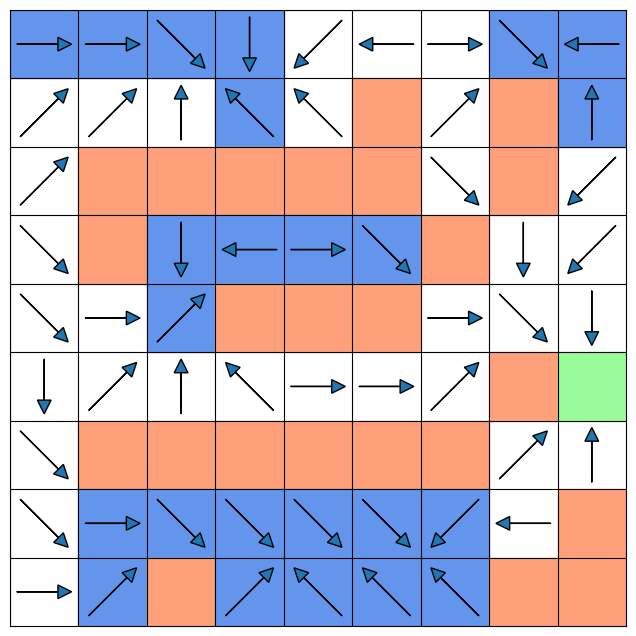

In [ ]:
# Your code goes here

def policy_eva(Value, policy):
    delta = float('inf')
    while delta > theta:
        delta = 0
        new_Value = np.copy(Value)
        for y in range(9):
            for x in range(9):
                s = (y,x)
                if s in obstacles:
                    continue
                if s in terminalStates:
                    continue
                v = 0
                for a in actions:
                    a_prob = policy[y,x,a]
                    for s_prime, Reward, Prob in getNextStatesRewardsAndProbabilities(state=s,action=a):
                        v += a_prob * Prob* (Reward + gamma * Value[s_prime[0], s_prime[1]])
                new_Value[y,x] = v
                delta = max(delta, abs(Value[y,x] - new_Value[y,x]))
        Value = new_Value
    return Value

def policy_improvement(Value):
    stable = True
    for y in range(9):
        for x in range(9):
            s = (y,x)
            if s in obstacles or s in terminalStates:
                continue
            best_action_value = -float('inf')
            best_action = None
            for a in actions:
                Q_value = 0
                for s_prime, Reward, Prob in getNextStatesRewardsAndProbabilities(state=s, action=a):
                    Q_value += Prob * (Reward + gamma * Value[s_prime[0], s_prime[1]])
                if Q_value > best_action_value:
                    best_action_value = Q_value
                    best_action = a
            new_policy = np.zeros(8)
            new_policy[best_action] = 1
            if not np.array_equal(policy[y, x], new_policy):
                stable = False
            policy[y, x] = new_policy
    return stable

iteration = 0
while True:
    Value = policy_eva(Value, policy)
    stable = policy_improvement(Value)
    iteration += 1
    if stable:
        break
    if iteration % 10 == 0:
        print(f"Iteration {iteration}")

print("Optimal State Values (V^*(s)):")
print(np.around(Value, 1))
drawPolicy(policy)

## Task 2.4)

Verify your results from the previous task by using the *Value Iteration* algorithm to compute the optimal value $V^*(s)$ for each cell. Make sure to reinitialize $V(s)$ with zero.

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Optimal State Values (V^*(s)):
[[129.3 135.4 142.6 140.3 141.  123.6 107.  112.9 107. ]
 [136.5 142.6 143.3 141.8 141.6   0.  111.8   0.  110.9]
 [124.1   0.    0.    0.    0.    0.  125.3   0.  134.1]
 [100.2   0.  114.5 117.4 115.  122.1   0.  152.7 152.8]
 [106.9 121.6 118.9   0.    0.    0.  149.1 172.7 167.8]
 [113.  120.  118.4 118.  105.7 130.4 148.6   0.    0. ]
 [138.7   0.    0.    0.    0.    0.    0.  169.6 167.8]
 [152.3 146.1 157.5 160.  160.  160.  160.  157.5   0. ]
 [150.7 153.6   0.  160.  160.  160.  160.    0.    0. ]]


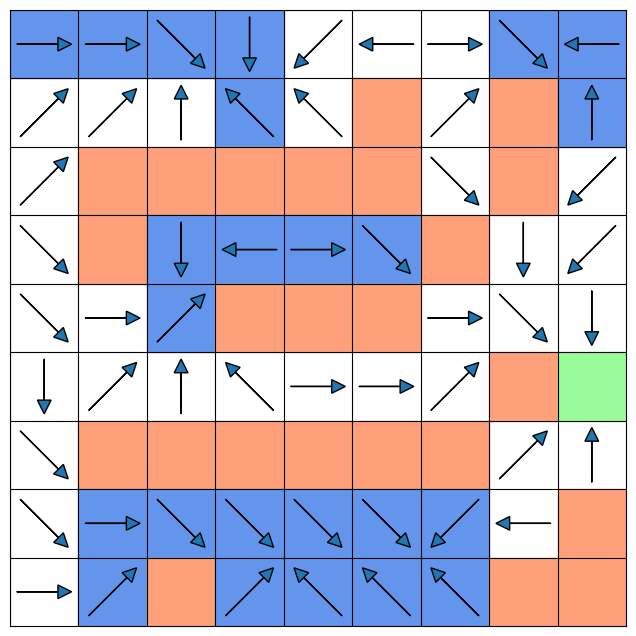

In [ ]:
# Your code goes here

def value_iteration(Value, gamma, theta):
    delta = float('inf')
    while delta > theta:
        delta = 0
        new_Value = np.copy(Value)
        for y in range(9):
            for x in range(9):
                s = (y, x)
                if s in obstacles or s in terminalStates:
                    continue
                best_value = -float('inf')
                for a in actions:
                    Q_value = 0
                    for s_prime, Reward, Prob in getNextStatesRewardsAndProbabilities(state=s, action=a):
                        Q_value += Prob * (Reward + gamma * Value[s_prime[0], s_prime[1]])
                    best_value = max(best_value, Q_value)
                new_Value[y, x] = best_value
                delta = max(delta, abs(Value[y, x] - new_Value[y, x]))
        Value = new_Value
    return Value

Value = value_iteration(Value, gamma, theta)

policy = np.zeros((9, 9, 8))
for y in range(9):
    for x in range(9):
        s = (y, x)
        if s in obstacles or s in terminalStates:
            continue
        best_action_value = -float('inf')
        best_action = None
        for a in actions:
            Q_value = 0
            for s_prime, Reward, Prob in getNextStatesRewardsAndProbabilities(state=s, action=a):
                Q_value += Prob * (Reward + gamma * Value[s_prime[0], s_prime[1]])
            if Q_value > best_action_value:
                best_action_value = Q_value
                best_action = a
        new_policy = np.zeros(8)
        new_policy[best_action] = 1
        policy[y, x] = new_policy


print("Optimal State Values (V^*(s)):")
print(np.around(Value, 1))

drawPolicy(policy)


## Task 2.5)

Modify your implementation of *Value Iteration* or *Policy Iteration* to ignore the random deviations in the environment. This can be achieved by calling *getNextStatesRewardsAndProbabilities(state, action, deviation=False)*.

Present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$. How and why have your state values and policy changed?

<div style="text-align: right; font-weight:bold"> 3 Points </div>

Optimal State Values (V^*(s)):
[[160.  160.  160.  160.  160.  143.  160.  160.  160. ]
 [160.  160.  160.  160.  160.    0.  160.    0.  160. ]
 [143.    0.    0.    0.    0.    0.  160.    0.  160. ]
 [143.    0.  160.  160.  160.  160.    0.  161.  161. ]
 [143.  160.  160.    0.    0.    0.  161.  180.  180. ]
 [143.5 160.  160.  160.  143.  143.9 161.    0.    0. ]
 [160.5   0.    0.    0.    0.    0.    0.  180.  180. ]
 [160.5 160.6 160.7 160.7 160.8 160.9 161.  161.    0. ]
 [160.5 160.6   0.  160.7 160.8 160.9 160.9   0.    0. ]]


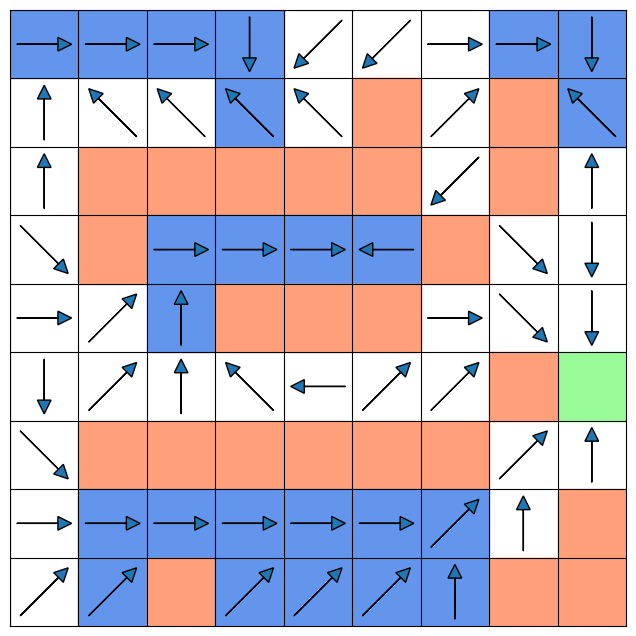

In [ ]:
# Your code goes here

# Value Iteration
def value_iteration_no_devi(Value, gamma, theta):
    delta = float('inf')
    while delta > theta:
        delta = 0
        new_Value = np.copy(Value)
        for y in range(9):
            for x in range(9):
                s = (y, x)
                if s in obstacles or s in terminalStates:
                    continue
                best_value = -float('inf')
                for a in actions:
                    Q_value = 0
                    for s_prime, Reward, Prob in getNextStatesRewardsAndProbabilities(state=s, action=a, deviation=False):
                        Q_value += Prob * (Reward + gamma * Value[s_prime[0], s_prime[1]])
                    best_value = max(best_value, Q_value)
                new_Value[y, x] = best_value
                delta = max(delta, abs(Value[y, x] - new_Value[y, x]))
        Value = new_Value
    return Value

Value = value_iteration_no_devi(Value, gamma, theta)

policy = np.zeros((9, 9, 8))
for y in range(9):
    for x in range(9):
        s = (y, x)
        if s in obstacles or s in terminalStates:
            continue
        best_action_value = -float('inf')
        best_action = None
        for a in actions:
            Q_value = 0
            for s_prime, Reward, Prob in getNextStatesRewardsAndProbabilities(state=s, action=a, deviation=False):
                Q_value += Prob * (Reward + gamma * Value[s_prime[0], s_prime[1]])
            if Q_value > best_action_value:
                best_action_value = Q_value
                best_action = a
        new_policy = np.zeros(8)
        new_policy[best_action] = 1
        policy[y, x] = new_policy


print("Optimal State Values (V^*(s)):")
print(np.around(Value, 1))

drawPolicy(policy)



How:

1. State values became higher, because there has no random move to ruin the predicted result.

2. The policy paths became straighter and more direct toward the goal.

Why:

1. There's no deviations anymore, and the agent can exactly go to the desired direction.

2. The risks are predicted and there's no deviation to step on the unexpected punish cells.

3. This allows the agent to optimize for the shortest and highest-reward paths.